In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

In [8]:
 from scipy.stats import chi2

В качестве непрерывного распределения выберем распределения хи квадрат с параметром k (число степеней свободы). Для распределения хи квадрат математическое ожидание равно k, а дисперсия 2k
Ссылка на статью в Википедии с данным распределением:https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

Запишем значение параметра k = 7 в переменную df. Сгенерируем выборку объема 1000 и запишем в переменную sample.

In [233]:
df = 8
sample = chi2.rvs(df, size=1000)

#### Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины

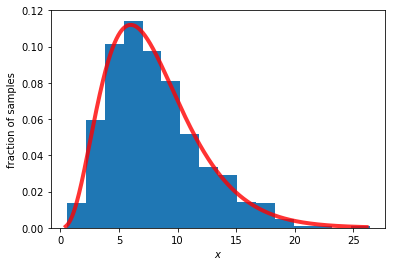

In [304]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(chi2.ppf(0.0001, df),chi2.ppf(0.999, df), 1000)
ax.plot(x, chi2.pdf(x, df),'r-', lw=4, alpha=0.8, label='chi2 pdf')
plt.hist(sample, bins=16, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

#### Центральная предельная теорема для n = 3

In [361]:
cpd3 = []
for i in range(1000):
    cpd3.append (np.mean(chi2.rvs(df, size=3)))

mu3 = df #теоретическое мат ожидание равно числу степеней свободы (=8)
sigma3 = math.sqrt(2*df/3.) #ско - корень из дисперсии деленной на n

$$ mu = k = 8$$
$$ sigma = \sqrt{\frac{D}{n}} = \sqrt{\frac{2k}{n}} =\sqrt{\frac{16}{n}}$$

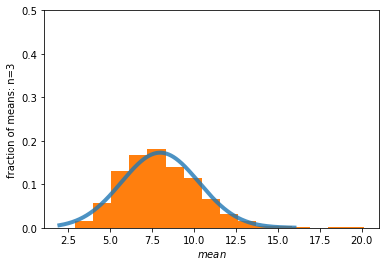

In [362]:
x = np.linspace(2,16,1000)
norm_rv3 = sts.norm(mu3, sigma3)
norm_pdf3 = norm_rv3.pdf(x)
plt.plot(x, norm_pdf3, lw=4, alpha=0.8) #построили соответствующее нормальное распределение
plt.hist(cpd3,bins=16,normed=True) #построили гистограмму
plt.ylabel('fraction of means: n=3')
plt.ylim([0,.5])
plt.xlabel('$mean$')

#### Центральная предельная теорема для n = 10

$$ mu = 8$$
$$ sigma = \sqrt{\frac{16}{10}}$$

In [363]:
cpd10 = []
for i in range(1000):
    cpd10.append (np.mean(chi2.rvs(df, size=10)))
mu10 = df 
sigma10 = math.sqrt(2*df/10.)

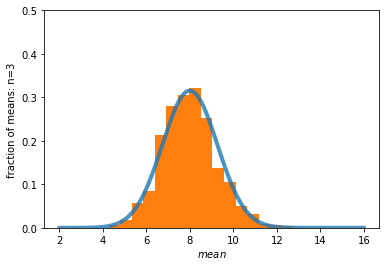

In [364]:
norm_rv10 = sts.norm(mu10, sigma10)
norm_pdf10 = norm_rv10.pdf(x)
plt.plot(x, norm_pdf10, lw=4, alpha=0.8) #построили соответствующее нормальное распределение
plt.hist(cpd10,bins=16,normed=True) #построили гистограмму
plt.ylabel('fraction of means: n=3')
plt.ylim([0,.5])
plt.xlabel('$mean$')

#### Центральная предельная теорема для n = 20

$$ mu = 8$$
$$ sigma = \sqrt{\frac{16}{20}}$$

In [365]:
cpd20 = []
for i in range(1000):
    cpd20.append (np.mean(chi2.rvs(df, size=20)))
mu20 = df 
sigma20 = math.sqrt(2*df/20.)

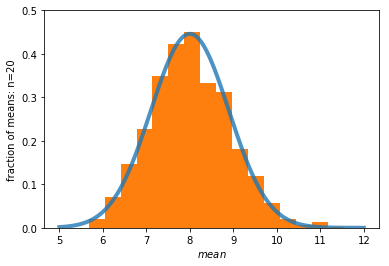

In [366]:
x = np.linspace(5,12,1000)
norm_rv20 = sts.norm(mu20, sigma20)
norm_pdf20 = norm_rv20.pdf(x)
plt.plot(x, norm_pdf20, lw=4, alpha=0.8) #построили соответствующее нормальное распределение
plt.hist(cpd20,bins=16,normed=True)
plt.ylabel('fraction of means: n=20')
plt.ylim([0,.5])
plt.xlabel('$mean$')

#### Центральная предельная теорема для n = 20

$$ mu = 8$$
$$ sigma = \sqrt{\frac{16}{30}}$$

In [373]:
cpd30 = []
for i in range(1000):
    cpd30.append (np.mean(chi2.rvs(df, size=30)))
    
mu30 = df
sigma30 = math.sqrt(16/30.)

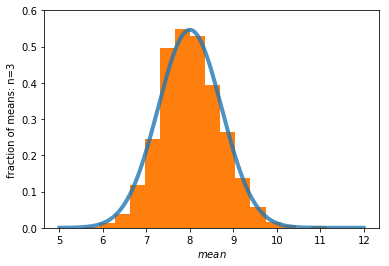

In [376]:
x = np.linspace(5,12,1000)
norm_rv30 = sts.norm(mu30, sigma30)
norm_pdf30 = norm_rv30.pdf(x)
plt.plot(x, norm_pdf30, lw=4, alpha=0.8) #построили соответствующее нормальное распределение
plt.hist(cpd30,bins=16,normed=True) #построили гистограмму
plt.ylabel('fraction of means: n=3')
plt.ylim([0,.6])
plt.xlabel('$mean$')

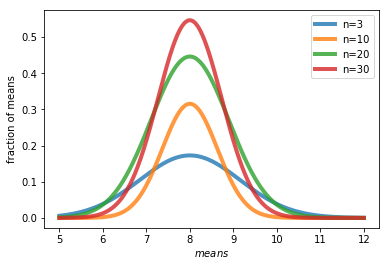

In [381]:
plt.plot(x, norm_pdf3, lw=4, alpha=0.8, label='n=3') 
plt.plot(x, norm_pdf10, lw=4, alpha=0.8, label='n=10') 
plt.plot(x, norm_pdf20, lw=4, alpha=0.8, label='n=20')
plt.plot(x, norm_pdf30, lw=4, alpha=0.8, label='n=30') 
plt.legend()
plt.ylabel('fraction of means')
plt.xlabel('$means$')

При увеличении объема выборок распределение становится все более гладким и все более похожим на нормальное. Таким образом, центральная предельная теорема в данном случае работает